## Лабораторная работа 2. Коррекция яркости и цвета

### Патракова Екатерина, РИМ-181226

## Автоконтраст черно-белого изображения

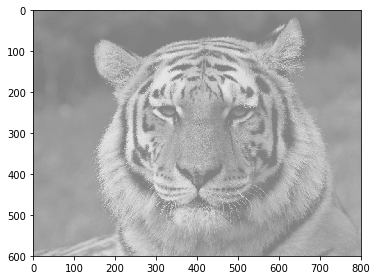

In [56]:
img=imread('tiger-low-contrast.png')
imshow(img)

In [54]:
Xmin=min(img.ravel())
Xmax=max(img.ravel())
k=255/(Xmax-Xmin)
img_contrast=((img-Xmin)*k).astype('uint8')

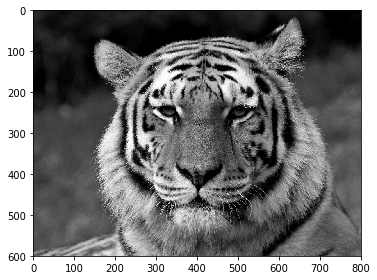

In [55]:
imshow(img_contrast)

## Подсчет минимума и максимума устойчивого автоконтраста

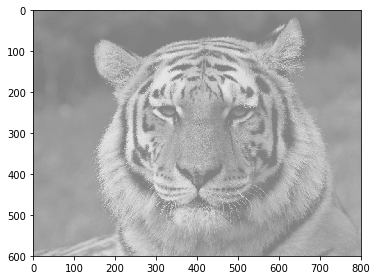

In [130]:
img=imread('tiger-low-contrast.png')
imshow(img)

In [131]:
def get_min_max(img):
    img=img.astype(float)
    k=round(len(img.ravel())*0.05)
    pixels=sorted(img.ravel())[k:-k]
    Xmin, Xmax=min(pixels), max(pixels)
    return Xmin, Xmax

In [132]:
Xmin, Xmax=get_min_max(img)

In [133]:
Xmin, Xmax

(129.0, 208.0)

## Устойчивый автоконтраст черно-белого изображения

In [134]:
from numpy import clip

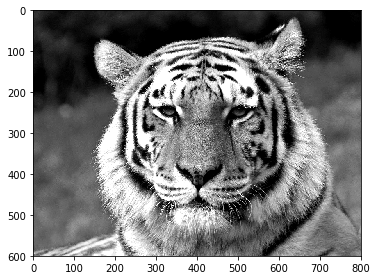

In [135]:
def get_contrast(img, Xmin, Xmax, max_c=255):
    k=255/(Xmax-Xmin)
    img_contrast=clip(((img-Xmin)*k), 0, max_c).astype('uint8')
    return img_contrast

img_contrast=get_contrast(img, Xmin, Xmax)    
imshow(img_contrast)

## Устойчивый цветной автоконтраст

In [263]:
def get_contrast(img, Xmin, Xmax, max_c=255):
    k=1/(Xmax-Xmin)
    img_contrast=((img-Xmin)*k)
    return img_contrast

def get_yuv(R, G, B):
    Y=0.2126*R+0.7152*G+0.0722*B
    U=-0.0999*R-0.3360*G+0.4360*B
    V=0.6150*R-0.5586*G-0.0563*B
    return dstack([Y,U,V])

def get_rgb(Y, U, V):
    R=Y+1.2803*V
    G=Y-0.2148*U-0.3805*V
    B=Y+2.1279*U
    return dstack([R, G, B])


In [264]:
img=imread('tiger-color.png')
img=img/255
yuv_img=get_yuv(img[:, :, 0],  img[:, :, 1], img[:, :, 2])
Xmin, Xmax=get_min_max(yuv_img[:, :, 0])
yuv_img[:, :, 0]=get_contrast(yuv_img[:, :, 0], Xmin, Xmax)
rgb_contrast=clip(get_rgb(yuv_img[:, :, 0], yuv_img[:, :,  1], yuv_img[:, :, 2]), 0, 1)
rgb_contrast=(rgb_contrast*255).astype('uint8')

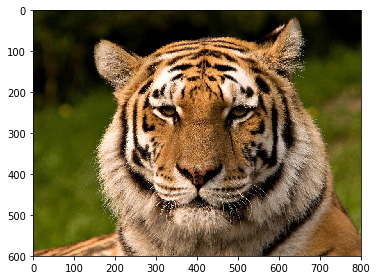

In [265]:
imshow(img)

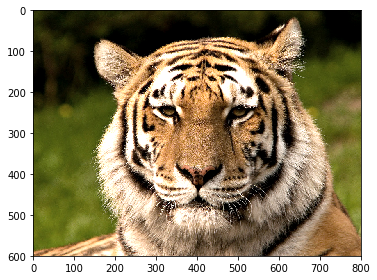

In [266]:
imshow(rgb_contrast)

## Преобразование серого мира

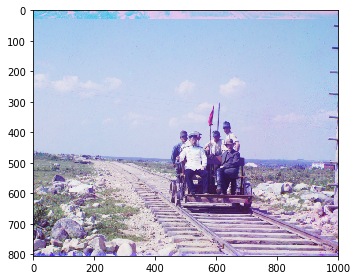

In [270]:
img=imread('railroad.png')
imshow(img)

In [272]:
img=img_as_float(img)

def get_rw_gw_bw(R, G, B):
    avg_r, avg_g, avg_b=R.mean(), G.mean(), B.mean()
    avg=(avg_r+avg_g+avg_b)/3
    rw, gw, bw=avg_r/avg, avg_g/avg, avg_b/avg
    return rw, gw, bw

In [274]:
rw, gw, bw=get_rw_gw_bw(img[:, :, 0],  img[:, :, 1], img[:, :, 2])

(0.9352384428539452, 0.9574282710824668, 1.107333286063588)

f:\users\cait\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


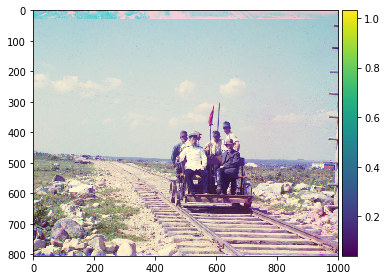

In [275]:
img[:, :, 0]=img[:, :, 0]/rw
img[:, :, 1]=img[:, :, 1]/gw
img[:, :, 2]=img[:, :, 2]/bw

img=clip(img, 0, 255)
imshow(img)

## Выравнивание гистограммы

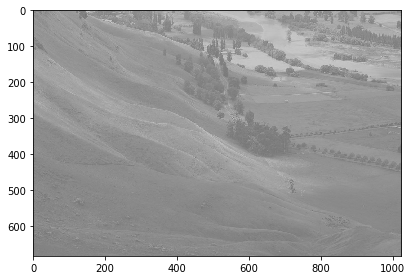

In [4]:
img=imread('landscape.png')
imshow(img)

In [5]:
from matplotlib.pyplot import hist
from numpy import histogram
import numpy as np

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.2000e+01, 0.0000e+00, 0.0000e+00, 1.9000e+01, 0.0000e+00,
        4.9000e+01, 0.0000e+00, 0.0000e+00, 9.3000e+01, 0.0000e+00,
        0.0000e+00, 2.2000e+02, 0.0000e+00, 4.8800e+02, 0.0000e+00,
        0.0000e+00, 1.0610e+03, 0.0000e+00, 0.0000e+00, 1.7470e+03,
        0.0000e+00, 0.0000e+00, 2.1600e+03, 0.0000e+00, 2.7180e+03,
        0.0000e+00, 0.0000e+00, 3.2590e+03, 0.0000e+00, 0.0000e+00,
        4.0390e+03, 0.0000e+00, 5.1080e+03, 0.0000e+00, 0.0000e+00,
        6.3950e+03, 0.0000e+00, 0.0000e+00, 8.4630e+03, 0.0000e+00,
        0.0000e+00, 1.0610e+04, 0.0000e+00, 1.3530e+04, 0.0000e+00,
        0.0000e+00, 1.6115e+04, 0.0000e+00, 0.0000e+00, 1.9125e+04,
        0.0000e+00, 2.2186e+04, 0.0000e+00, 0.0000e+00, 2.5696e+04,
        0.0000e+00, 0.0000e+00, 2.8701e+04, 0.0000e+00, 0.0000e+00,
        2.8324e+04, 0.0000e+00, 2.5759e+04, 0.0000e+00, 0.0000e+00,
        2.4369e+04, 0.0000e+00, 0.0000e+00, 2.35

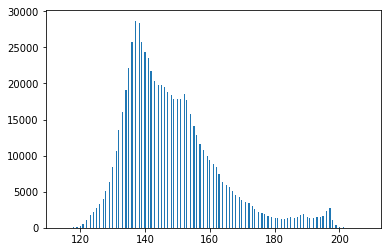

In [6]:
hist(img.ravel(), bins=255)

In [7]:
counts = [ np.sum(img.ravel() == k) for k in range(0, 256) ]
size=img.ravel().shape[0]
cdf=np.array([np.sum(counts[:x]) for x in range(0, 256)])
cdf_min=min(cdf[cdf>0])
img_ravel=np.array([round((cdf[px]-cdf_min)*255/(size-1)) for px in img.ravel()]).reshape([683, 1024])

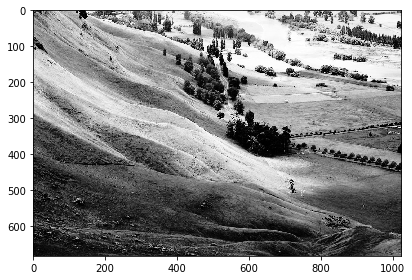

In [8]:
imshow(img_ravel.astype('uint8'))

(array([ 1944.,  3907.,  2718.,  3259.,  4039.,     0.,  5108.,     0.,
         6395.,     0.,  8463.,     0.,     0., 10610.,     0.,     0.,
            0., 13530.,     0.,     0.,     0.,     0., 16115.,     0.,
            0.,     0.,     0.,     0., 19125.,     0.,     0.,     0.,
            0.,     0.,     0., 22186.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 25696.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 28701.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 28324.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 25759.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 24369.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 23578.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 21775.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 20385.,     0.,     0., 

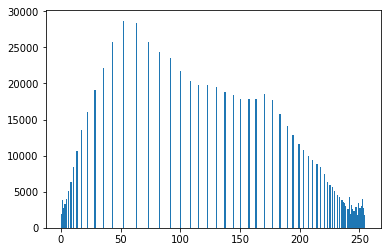

In [9]:
hist(img_ravel.ravel(), bins=255)